## Load the model and test it

Using cache found in C:\Users\yarab/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-23 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 640x640 2 car_lefts, 3 car_rights, 1 hen, 29 obstacles
Speed: 33.9ms pre-process, 101.4ms inference, 111.9ms NMS per image at shape (1, 3, 640, 640)


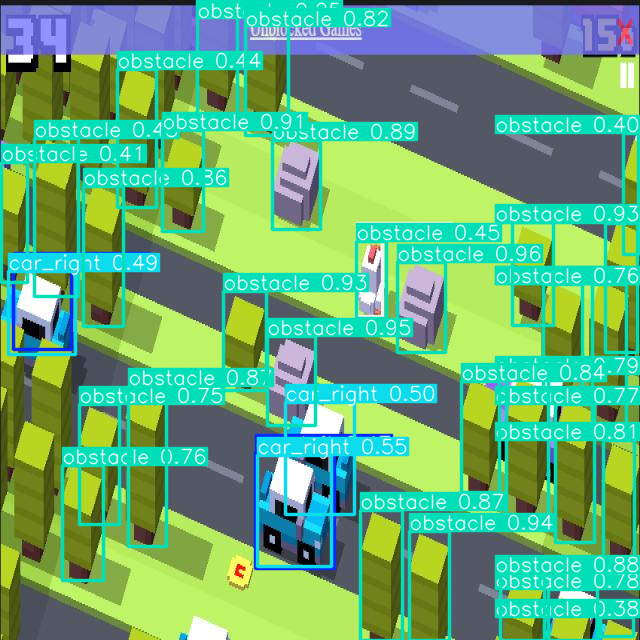

In [2]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

result = model('test.jpg')
print(result)
result.show()  # show results

In [3]:
detections = result.xyxy[0]  # img1 predictions (tensor)
for detection in detections:
    x_min, y_min, x_max, y_max, confidence, class_id = detection
    print(f"Class ID: {class_id}, Confidence: {confidence}, Coordinates: ({x_min}, {y_min}, {x_max}, {y_max})")

Class ID: 3.0, Confidence: 0.964948296546936, Coordinates: (397.3777160644531, 262.824462890625, 445.0121765136719, 352.84423828125)
Class ID: 3.0, Confidence: 0.9473466277122498, Coordinates: (267.80047607421875, 336.5545349121094, 315.5611572265625, 425.4245910644531)
Class ID: 3.0, Confidence: 0.9385096430778503, Coordinates: (409.64666748046875, 531.576904296875, 449.88153076171875, 640.0)
Class ID: 3.0, Confidence: 0.9291175603866577, Coordinates: (512.5855712890625, 222.2987823486328, 553.4044189453125, 325.33526611328125)
Class ID: 3.0, Confidence: 0.9262547492980957, Coordinates: (223.71697998046875, 291.09710693359375, 266.2961120605469, 390.43359375)
Class ID: 3.0, Confidence: 0.9093680381774902, Coordinates: (162.5248260498047, 130.44134521484375, 203.3562469482422, 231.36782836914062)
Class ID: 3.0, Confidence: 0.894432008266449, Coordinates: (272.2248229980469, 140.86599731445312, 320.3301086425781, 229.77597045898438)
Class ID: 3.0, Confidence: 0.8837711811065674, Coordin

## Create a grid that represents an environment

In [ ]:
import numpy as np

def map_to_grid(image_size, grid_size, boxes, class_labels):
    
    width, height = image_size
    grid_width, grid_height = grid_size
    grid = np.zeros((grid_height, grid_width), dtype=int)

    cell_width = width / grid_width
    cell_height = height / grid_height

    for (x_min, y_min, x_max, y_max), label in zip(boxes, class_labels):
        # Determine the grid cell indices
        x_start = int(x_min // cell_width)
        y_start = int(y_min // cell_height)
        x_end = int(np.ceil(x_max / cell_width))
        y_end = int(np.ceil(y_max / cell_height))

        # Fill the grid with the object label
        for y in range(y_start, y_end):
            for x in range(x_start, x_end):
                grid[y, x] = label

    return grid


In [ ]:
import matplotlib.pyplot as plt

image_size = (640, 640)  # Image dimensions (width, height)
grid_size = (27, 24)    # Grid dimensions (N, M)

detections_np = detections.cpu().numpy()

boxes = []
labels = []
for detection in detections_np:
    x_min, y_min, x_max, y_max, confidence, class_id = detection
    boxes.append((x_min, y_min, x_max, y_max))
    labels.append(int(class_id))  

grid = map_to_grid(image_size, grid_size, boxes, labels)
print(grid)


[[0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 3 3 3 3 3 3 3 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 0 0 0 0 0 0 3 3 3 0 3 3]
 [3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 3 3 0 0 3 3 3 0 3 3]
 [0 0 0 0 3 3 0 0 0 3 3 3 0 0 0 2 2 3 3 0 0 3 3 3 3 3 3]
 [0 0 0 0 3 3 0 0 0 3 3 3 0 0 0 2 2 3 3 0 0 3 3 3 3 3 3]
 [0 0 0 0 3 3 0 0 0 3 3 3 3 3 0 0 3 3 3 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 3 3 3 0 0 0 3 3 3 3 3]
 [0 0 0 0 0 3 3 3 0 3 3 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 0 0 0 3 1 1 1 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3 0 0 0 0 0 0 0